- 데이터 로딩

In [1]:
import numpy as np
np.random.seed(123)

In [2]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
y_train[0]

1

In [5]:
max([max(seq) for seq in x_train])

9999

- 단어 인덱싱 : 토큰 사전 만들기

In [6]:
word_idx = imdb.get_word_index()
idx2word = dict([(value, key) for (key, value) in word_idx.items()])
word2idx = dict([(key, value) for (key, value) in word_idx.items()])
idx2word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [7]:
decoded_review = ' '.join([idx2word.get(i-3, '.') for i in x_train[0]])
decoded_review

". this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert . is an amazing actor and now the same being director . father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for . and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also . to the two little boy's that played the . of norman and paul they were just brilliant children are often left out of the . list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

- 원핫인코딩

In [8]:
def onehot(seq, dim=10000):
    results = np.zeros((len(seq), dim))
    for i, sequence in enumerate(seq):
        results[i, sequence] = 1
    return results

In [9]:
x_train = onehot(x_train)
x_test = onehot(x_test)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

- 모델 정의

In [12]:
from keras import models
from keras.layers import Dense

In [13]:
model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


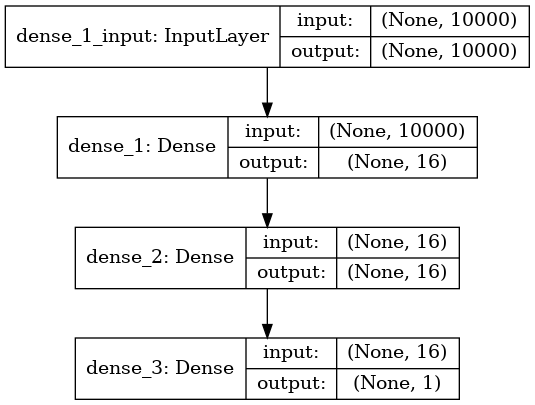

In [14]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

- 컴파일

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

- Validation Set 준비

In [16]:
x_val = x_train[:10000]
p_x_train = x_train[10000:]
y_val = y_train[:10000]
p_y_train = y_train[10000:]

- 모델 학습

In [17]:
history = model.fit(p_x_train, p_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 48us/step - loss: 0.5193 - acc: 0.7895 - val_loss: 0.3979 - val_acc: 0.8696
Epoch 2/20
15000/15000 [==============================] - 1s 34us/step - loss: 0.3210 - acc: 0.8996 - val_loss: 0.3190 - val_acc: 0.8844
Epoch 3/20
15000/15000 [==============================] - 1s 34us/step - loss: 0.2347 - acc: 0.9259 - val_loss: 0.2871 - val_acc: 0.8882
Epoch 4/20
15000/15000 [==============================] - 1s 34us/step - loss: 0.1865 - acc: 0.9405 - val_loss: 0.2975 - val_acc: 0.8801
Epoch 5/20
15000/15000 [==============================] - 1s 34us/step - loss: 0.1522 - acc: 0.9516 - val_loss: 0.2834 - val_acc: 0.8884
Epoch 6/20
15000/15000 [==============================] - 1s 35us/step - loss: 0.1277 - acc: 0.9611 - val_loss: 0.3112 - val_acc: 0.8787
Epoch 7/20
15000/15000 [==============================] - 1s 35us/step - loss: 0.1063 - acc: 0.9679 - val_loss: 0.3232 - val_acc

In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

- 모델 학습 결과 시각화

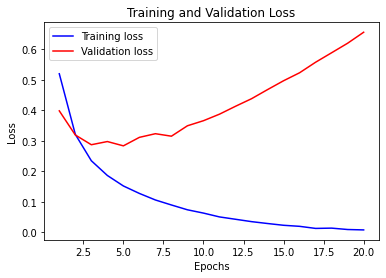

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(loss) + 1)

plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

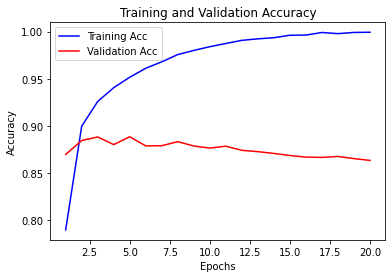

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'blue', label='Training Acc')
plt.plot(epochs, val_acc, 'red', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

- 과대적합을 줄이기 위해 Epoch을 줄이기

In [21]:
model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.fit(p_x_train, p_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 42us/step - loss: 0.5506 - acc: 0.7786 - val_loss: 0.4393 - val_acc: 0.8446
Epoch 2/4
15000/15000 [==============================] - 1s 36us/step - loss: 0.3489 - acc: 0.8924 - val_loss: 0.3316 - val_acc: 0.8809
Epoch 3/4
15000/15000 [==============================] - 1s 36us/step - loss: 0.2529 - acc: 0.9197 - val_loss: 0.3043 - val_acc: 0.8794
Epoch 4/4
25000/25000 [==============================] - 1s 26us/step


In [22]:
results

[0.29143288761138914, 0.8842399716377258]

- 훈련된 모델로 새로운 데이터에 대해 예측하기

In [23]:
model.predict(x_test)

array([[0.29377827],
       [0.998743  ],
       [0.9200537 ],
       ...,
       [0.10772841],
       [0.19230273],
       [0.5720451 ]], dtype=float32)